# Проверка гипотез по увеличению выручки в интернет-магазине



## Описание проекта

На основе данных, подготовленных маркетинговым отделом интернет-магазина, необходимо выполнить приоритизацию гипотез, запустить A/B-тест и проанализировать результаты.


## Описание данных


Файл /datasets/hypothesis.csv. 
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Файл /datasets/orders.csv. 
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv. 
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Часть 1. Приоритизация гипотез.



В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Задача
- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import os

In [2]:
# hyp = pd.read_csv('hypothesis.csv')
# hyp = pd.read_csv('/datasets/hypothesis.csv')

pth1 = 'hypothesis.csv'
pth2 = '/datasets/hypothesis.csv'

if os.path.exists(pth1):
    hyp = pd.read_csv(pth1)
elif os.path.exists(pth2):
    hyp = pd.read_csv(pth2)
else:
    print('Something is wrong')

In [3]:
hyp

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
with pd.option_context('display.max_colwidth', 120):
    display(hyp)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [5]:
# применим фреймворк ICE для приоретизации гипотез, отсортируем их по убыванию приоритета
hyp['ICE_score'] = (hyp.Impact * hyp.Confidence) / hyp.Efforts
with pd.option_context('display.max_colwidth', 120):
    display(hyp.sort_values('ICE_score',ascending=False))


,Hypothesis,Reach,Impact,Confidence,Efforts,ICE_score
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


In [6]:
# применим фреймворк RICE для приоретизации гипотез, отсортируем их по убыванию приоритета
hyp['RICE_score'] = (hyp.Reach * hyp.Impact * hyp.Confidence) / hyp.Efforts
with pd.option_context('display.max_colwidth', 120):
    display(hyp.sort_values('RICE_score',ascending=False))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE_score,RICE_score
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


### Выводы:

Наиболее перспктивные гипотезы по ICE: 8, 0, 7, 6

Наиболее перспктивные гипотезы по RICE: 7, 2, 0, 6

Видиим, что при использовании критерия RICE порядок наиболее преспективных гипотез менятеся, а также пропадает гипотеза 8, но поялвяется гипотеза 2. Наблюдаемое изменение объясняется влиянием параметра Reach (скольких пользователей коснется изменение) на итоговый рейтинг. Например, для гипотезы 8 этот параметр равен 1, что проcаживет ее RICE-рейтинг, и наоборот для гипотезы 2: Reach равен 8, что существенно выше чем у большинства других гипотез.


## Часть 2. Анализ A/B-теста

Результаты проведенного A/B-теста описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

Для начала загрузим данные, проверим пропуски и типы

In [7]:
# orders = pd.read_csv('orders.csv')
# visitors = pd.read_csv('visitors.csv')

# orders = pd.read_csv('/datasets/orders.csv')
# visitors = pd.read_csv('/datasets/visitors.csv')


pth1 = 'visitors.csv'
pth2 = '/datasets/visitors.csv'

if os.path.exists(pth1):
    visitors = pd.read_csv(pth1)
elif os.path.exists(pth2):
    visitors = pd.read_csv(pth2)
else:
    print('Something is wrong')
    


pth1 = '/datasets/orders.csv'
pth2 = 'orders.csv'

if os.path.exists(pth1):
    orders = pd.read_csv(pth1)
elif os.path.exists(pth2):
    orders = pd.read_csv(pth2)
else:
    print('Something is wrong')



In [8]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [10]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [11]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Видим, что пропусков в данных нет. Приведем столбцы с датами к datetime

In [12]:
orders.date = pd.to_datetime(orders.date)
visitors.date = pd.to_datetime(visitors.date)

In [13]:
print('Минимальная дата в датасете orders:', orders.date.min())
print('Максимальная дата в датасете orders:', orders.date.max())

print('\nМинимальная дата в датасете visitors:', visitors.date.min())
print('Максимальная дата в датасете visitors:', visitors.date.max())

Минимальная дата в датасете orders: 2019-08-01 00:00:00
Максимальная дата в датасете orders: 2019-08-31 00:00:00

Минимальная дата в датасете visitors: 2019-08-01 00:00:00
Максимальная дата в датасете visitors: 2019-08-31 00:00:00


In [14]:
visitors.group.unique()

array(['A', 'B'], dtype=object)

In [15]:
orders.group.unique()

array(['B', 'A'], dtype=object)

In [23]:
### КОД РЕВЬЮЕРА
orders.groupby('visitorId').agg({"group":"nunique"}).value_counts("group")

group
1    973
2     58
dtype: int64

#### 1. Построим график кумулятивной выручки по группам

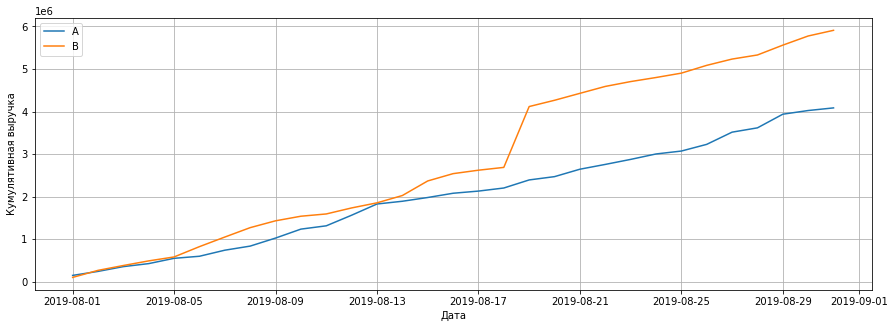

In [128]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

# агрегируем значения
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 

# получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg(
    {'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']) 

# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg(
    {'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg(
    {'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(15, 5))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.grid()
plt.legend();

Видим, что выручка почти равномерно увеличивается в течение всего теста. Однако для группы B наблюдается резкий скачок выручки 18 августа. Данный скачок может быть связан как с появлением очень дорогих заказов, так и с резким увеличением числа заказов.

#### 2.Построим график кумулятивного среднего чека по группам.

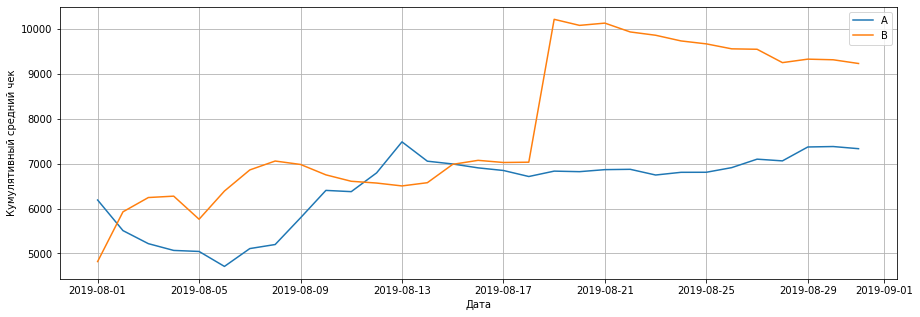

In [129]:
plt.figure(figsize=(15, 5))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.grid()
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')
plt.legend();

Для кумулятивного среднего чека аналогично видим резкий скачок 18 августа для группы B. Таким образом, скачок выручки связан с появлением аномально дорогих заказов в выборке. После указанного скачка чек для группы B постепенно падает к концу теста. Для группы A  начиная с 14 августа средний чек становится равномерным

#### 3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

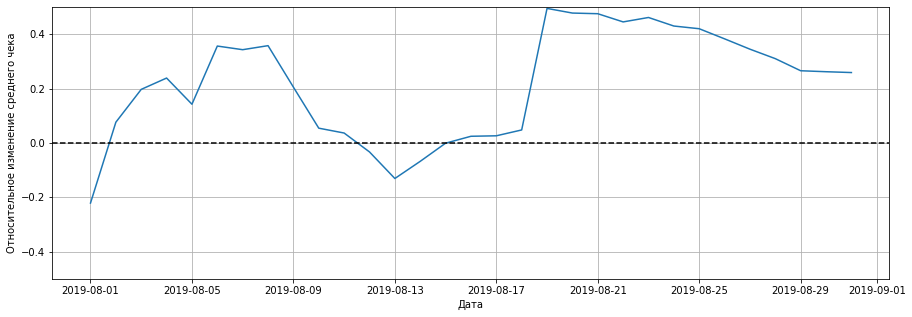

In [130]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15, 5))

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.grid()
plt.ylim(-0.5,0.5)
plt.xlabel('Дата')
plt.ylabel('Относительное изменение среднего чека');

На графике относительного изменения кумулятивного среднего чека группы B к группе A наблюдаем резкий рост в начале теста и 18 августа (как и на предыдущих графиках) 

#### 4. Построим график кумулятивной конверсии по группам.

In [131]:
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


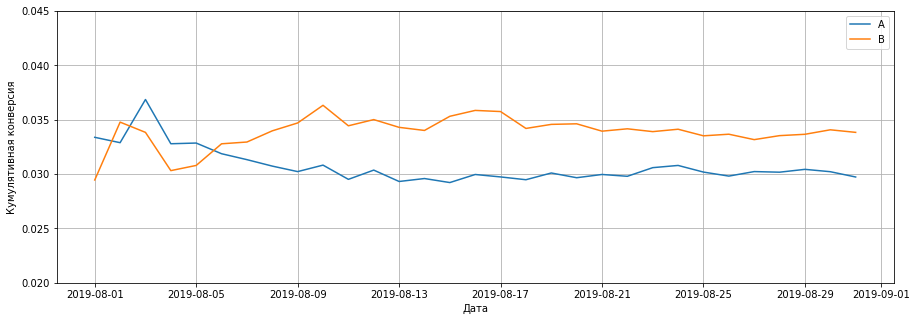

In [132]:
plt.figure(figsize=(15, 5))

# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()


plt.grid()
plt.ylim(0.02,0.045)
plt.xlabel('Дата')
plt.ylabel('Кумулятивная конверсия');

In [133]:
cumulativeData

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
1,2019-08-01,B,21,20,101217,713,0.029453
2,2019-08-02,A,44,38,242401,1338,0.032885
3,2019-08-02,B,45,43,266748,1294,0.034776
4,2019-08-03,A,68,62,354874,1845,0.036856
...,...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708,0.033657
58,2019-08-30,A,545,493,4022970,18037,0.030216
59,2019-08-30,B,620,567,5774631,18198,0.034070
60,2019-08-31,A,557,503,4084803,18736,0.029729


На графиках конверсии наблюдается симметрия:  начиная с 6 августа конверсия группы B вырвалась вперёд и зафиксировалась, в то время как конверсия группы A просела и также зафиксировалась.

#### 5. Построим график относительного изменения кумулятивной конверсии группы B к группе A.

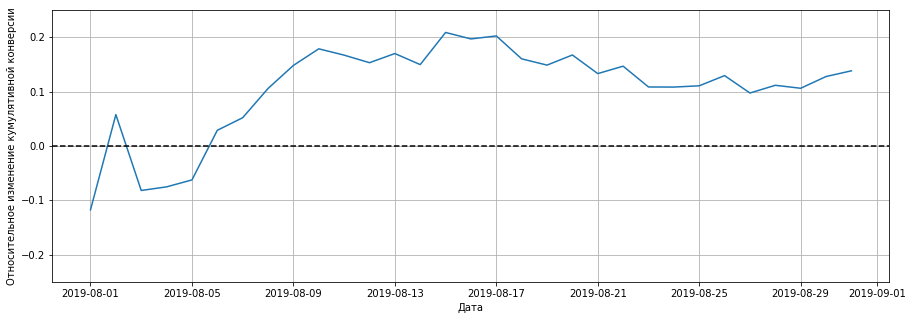

In [134]:
plt.figure(figsize=(15, 5))

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], 
        mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

# plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.ylim(-0.25,0.25)
plt.grid()
plt.xlabel('Дата')
plt.ylabel('Относительное изменение кумулятивной конверсии');

В начале теста группа B по значениям кумулятивной конверсии проигрывала группе A, затем вырвалась вперёд. В целом, можно скзаать, что отношение конверсии окончательно еще не установилось

#### 6. Построим точечный график количества заказов по пользователям. 

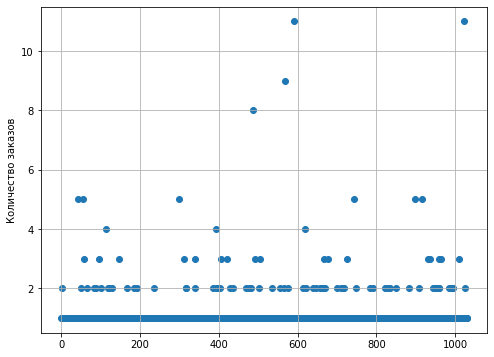

In [135]:
ordersByUsers = (
                orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})
                )

ordersByUsers.columns = ['visitorId', 'orders']

plt.figure(figsize=(8, 6))

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])

plt.grid()

plt.ylabel('Количество заказов');

Видим много пользователей с 2-5 заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет.

#### 7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. 

In [136]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[2. 4.]


Получается, что 95% пользователей оформляли два заказа и меньше. И 99% пользователей заказывали 4 и менее раз. В качестве границы для определения аномальных заказов положим значение 2

#### 8. Построим точечный график стоимостей заказов.

In [137]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


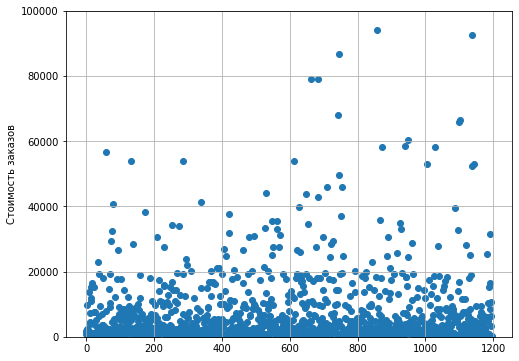

In [138]:
plt.figure(figsize=(8, 6))

x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.grid()

plt.ylabel('Стоимость заказов')

# ограничим по y до 100000, т.к выше находятся только 2 точки
plt.ylim(0,100000);

#### 9. Посчитаем 95-й и 99-й перцентили стоимости заказов.

In [139]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


Получается, что 95% заказов имеют чек 28000 и меньше. И 99% имеют чек 58233.2 и меньше. Все что выше 95 перцентили будем считать за выбросы, таким образом, в качестве границы для определения аномальных заказов положим значение 28000

#### 10. Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. 

Сформулируем гипотезы. 
- Нулевая: различий в конверсии между группами нет. 
- Альтернативная: различия в конверсии между группами есть.

In [140]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("p-value: {}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительные различия в конверсии: {0:.4f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.016792355056752608
Относительные различия в конверсии: 0.1381


P-value меньше 0.05. Таким образом, отвергаем нулевую гипотезу и принимаем альтернативную: различия в конверсии между группами есть

В данной задаче для проверки гипотез используется непараметрический критерий Манна-Уитни, т.к. предполагается, что в данных A/B теста содержатся аномальные значения (выбросы), которые могут сильно сдвигать результаты параметрических тестов.

#### 11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.


Сформулируем гипотезы. 
- Нулевая: различий в среднем чеке между группами нет. 
- Альтернативная: различия в среднем чеке между группами есть.

In [141]:
# Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов.
print('p-value: {}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
#А ещё найдём относительные различия в среднем чеке между группами:
print('относительные различия в среднем чеке: {0:.4f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.7292909855432458
относительные различия в среднем чеке: 0.2587


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.

Здесь можно учесть то, что в сырых данных есть выбросы, которые существенно не сказываются на p-value при использовании непараметрического теста, но которые сильно завышают относительные различия в среднем чеке. Поэтому относительные различия по сырым данным лучше не учитывать всерьез, и рассматривать их именно после отброса аномальных значений (а там относительные различия в среднем чеке порядка 1.3%)

#### 12. Посчитаем статистическую значимость различий в конверсии между группами по очищенным данным. 

Сформулируем гипотезы. 
- Нулевая: различий в конверсии между группами нет. 
- Альтернативная: различия в конверсии между группами есть.

In [142]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 4]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 4]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print('кол-во аномальных пользователей:', abnormalUsers.shape[0])

кол-во аномальных пользователей: 59


In [143]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('P-value: {}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('относительные различия в конверсии: {0:.4f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value: 0.018457083488550192
относительные различия в конверсии: 0.1453


Выводы после очистки данных от аномалий не меняются:

- P-value и относительные различия в конверсии для двух групп практически не поменялись
- P-value меньше 0.05. Таким образом, отвергаем нулевую гипотезу и принимаем альтернативную: различия в конверсии между группами есть

#### 13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по очищенным данным.


Сформулируем гипотезы. 
- Нулевая: различий в среднем чеке между группами нет. 
- Альтернативная: различия в среднем чеке между группами есть.

In [144]:

print(
    'P-value: {}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "относительные различия в среднем чеке: {0:.4f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

P-value: 0.9612742488180921
относительные различия в среднем чеке: -0.0138


P-value после очистки данных от выбросов стал еще больше. Выводы по среднему чеку после отбрасывания аномалий не меняются, хотя и относительная разница снизилась с 25% до 1.4% : 

P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.

### Выводы:
- В начале теста группа B по значениям кумулятивной конверсии несколько проигрывала группе A, затем вырвалась вперёд. В целом, можно скзаать, что отношение конверсии окончательно еще не установилось
- Начиная с 6 августа конверсия группы B вырвалась вперёд и зафиксировалась, в то время как конверсия группы A просела и также зафиксировалась.
- На графике относительного изменения кумулятивного среднего чека группы B к группе A наблюдаем резкий рост в начале теста и 18 августа
- В ходе анализа A/B-теста было показано, что как по "сырым", так и по очищенным данным наблюдается статистически значимое различие в конверсии между группами A и B.
- Различие в среднем чеке между группами A и B не является статистически значимым, несмотря на визуальное различие графиков.
- Можно заключить, что в целом  результаты группы B лучше группы A, особенно с точки зрения конверсии. Данный факт подводит к решению остановить тест и зафиксировать победу группы B.
